In [1]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
images = np.array([mpimg.imread('gen_img' + str(i) + '.png').flatten() for i in range(5)])

In [3]:
images

array([[0.8509804 , 0.87058824, 0.92156863, ..., 0.32941177, 0.29803923,
        1.        ],
       [0.654902  , 0.72156864, 0.85882354, ..., 0.52156866, 0.4392157 ,
        1.        ],
       [0.78039217, 0.8352941 , 0.92941177, ..., 0.22352941, 0.15686275,
        1.        ],
       [0.8627451 , 0.87058824, 0.9098039 , ..., 0.40784314, 0.39215687,
        1.        ],
       [0.9411765 , 0.9137255 , 0.9137255 , ..., 0.44313726, 0.45882353,
        1.        ]], dtype=float32)

In [4]:
f = FastICA(5)

In [6]:
img = mpimg.imread('ica_image.jpeg')

In [9]:
imgarr = np.asarray(img.flatten(), np.float)

In [22]:
imgarr = imgarr[None]/256 + 1e-10

array([[0.69921875, 0.734375  , 0.72265625, ..., 0.5703125 , 0.60546875,
        0.53125   ],
       [0.69921875, 0.734375  , 0.72265625, ..., 0.5703125 , 0.60546875,
        0.53125   ],
       [0.69921875, 0.734375  , 0.72265625, ..., 0.5703125 , 0.60546875,
        0.53125   ]])

In [52]:
f.fit(images.T)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=5, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [59]:
images

array([[0.8509804 , 0.87058824, 0.92156863, ..., 0.32941177, 0.29803923,
        1.        ],
       [0.654902  , 0.72156864, 0.85882354, ..., 0.52156866, 0.4392157 ,
        1.        ],
       [0.78039217, 0.8352941 , 0.92941177, ..., 0.22352941, 0.15686275,
        1.        ],
       [0.8627451 , 0.87058824, 0.9098039 , ..., 0.40784314, 0.39215687,
        1.        ],
       [0.9411765 , 0.9137255 , 0.9137255 , ..., 0.44313726, 0.45882353,
        1.        ]], dtype=float32)

In [60]:
f.transform(images[1].reshape((1,-1)))

ValueError: operands could not be broadcast together with shapes (1,1920000) (5,) (1,1920000) 

In [61]:
inv1 = f.inverse_transform(np.array([[0, 0, 0, 1, 0]]))

In [62]:
inv1.min(),inv1.mean(),inv1.max()

(-258.1203801587347, -234.86975425424671, -165.8145009597488)

In [64]:
inv1

array([[-254.4999193 , -165.81450096, -255.05147905, -240.8624918 ,
        -258.12038016]])

In [98]:
a = f.fit_transform(images.T).T

In [90]:
mi = a.min()
ma = a.max()

In [91]:
x=(a-mi)/(ma-mi)

In [99]:
a.min(),a.mean(),a.max()

(-0.002652870087915994, -1.452157560753792e-08, 0.0026514419226465135)

In [95]:
x.min()

0.0

In [101]:
plt.figure(figsize=(10,20))
plt.imshow(a[1].reshape((800,600,4)))

ValueError: cannot reshape array of size 5 into shape (800,600,4)

<Figure size 720x1440 with 0 Axes>

In [38]:
Min = f.components_[1].min()
Max = f.components_[1].max()

In [39]:
a =(f.components_[1]-Min)/(Max-Min)

In [41]:
a

array([0.        , 1.        , 0.96599657, ..., 0.96505624, 0.96521248,
       0.9651726 ])

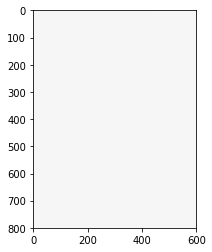

In [43]:
plt.imshow(a.reshape((800, 600, 4))[:,:,:3])

In [ ]:

def process(images):
    # TODO: fix means and variances of images
    pass

In [2]:

images = np.array([mpimg.imread(f'gen_img{i}.png').flatten() for i in range(5)])

# TODO: Fit Fast ICA and get new images

new_images = None
new_images = new_images.reshape((3, 800, 600, 4))
new_images = process(new_images)


FileNotFoundError: [Errno 2] No such file or directory: 'gen_img0.png'

In [ ]:

    for i in new_images:
        plt.imshow(i.clip(min=0, max=1))
        plt.show()